nhận dạng 10 món ăn việt nam

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy


In [24]:

folder = '/content/drive/MyDrive/anh/do_an/'

img_size=100;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('banh_cuon'):
    output = 1.0
  if file.startswith('banh_mi'):
    output = 2.0
  if file.startswith('banh_xeo'):
    output = 3.0
  if file.startswith('bun_bo_hue'):
    output = 4.0
  if file.startswith('bun_dau_mam-tom'):
    output = 5.0
  if file.startswith('chao_long'):
    output = 6.0
  if file.startswith('com_tam'):
    output = 7.0
  if file.startswith('goi_cuon'):
    output = 8.0
  if file.startswith('pho'):
    output = 9.0
  if file.startswith('mi_quang'):
    output = 10.0

  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/anh/hoa/hoa_photos.npy',photos)
# save('/content/drive/MyDrive/anh/hoa/hoa_labels.npy',labels)


(5500, 100, 100, 3) (5500,)


In [25]:
photos = photos.astype('float32')/255.0

print(photos.shape)

(5500, 100, 100, 3)


In [26]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.10, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.20, random_state=10)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)


(3960, 100, 100, 3)
(3960,)
(550, 100, 100, 3)
(550,)
(990, 100, 100, 3)
(990,)


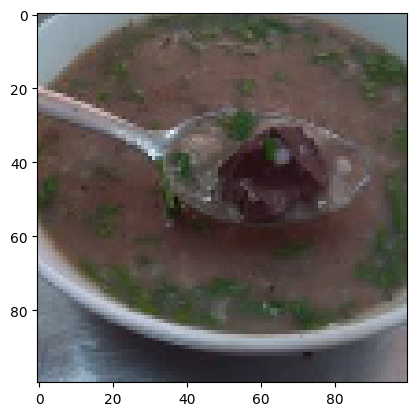

Cái này là:  6.0


In [27]:
image_test=300
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Cái này là: ', trainY[image_test])


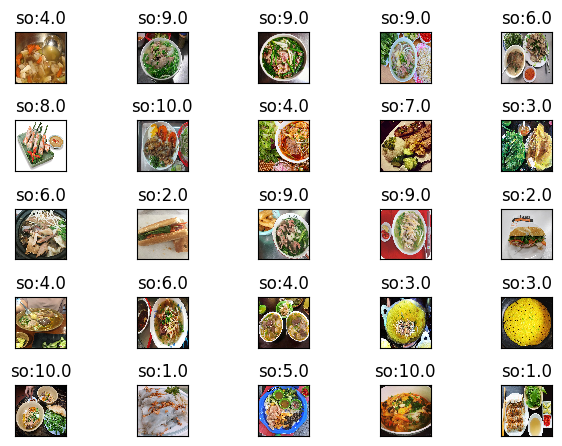

In [28]:

for i in range(25):  # 30 hình ảnh
  plt.subplot(5,5,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])
  

In [29]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)


(3960, 11)
(550, 11)
(990, 11)


In [30]:

batch_size=128
epochs=50
classes =11

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 4 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 5 VGG
model.add(Conv2D(512,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
     
# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(258, activation = 'relu'))
# model.add(Dense(512, activation = 'relu'))


model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     

#Tăng cường data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()
  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

In [31]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)


Epoch 1/50
31/31 [==============================] - 6s 138ms/step - loss: 2.2809 - accuracy: 0.1485 - val_loss: 2.2508 - val_accuracy: 0.1717
Epoch 2/50
31/31 [==============================] - 2s 70ms/step - loss: 2.0675 - accuracy: 0.2402 - val_loss: 2.0029 - val_accuracy: 0.2737
Epoch 3/50
31/31 [==============================] - 2s 70ms/step - loss: 1.9278 - accuracy: 0.3008 - val_loss: 1.9016 - val_accuracy: 0.3232
Epoch 4/50
31/31 [==============================] - 2s 73ms/step - loss: 1.8382 - accuracy: 0.3576 - val_loss: 1.8979 - val_accuracy: 0.3192
Epoch 5/50
31/31 [==============================] - 2s 73ms/step - loss: 1.7253 - accuracy: 0.3869 - val_loss: 1.8306 - val_accuracy: 0.3768
Epoch 6/50
31/31 [==============================] - 2s 78ms/step - loss: 1.5886 - accuracy: 0.4424 - val_loss: 1.6622 - val_accuracy: 0.4444
Epoch 7/50
31/31 [==============================] - 2s 73ms/step - loss: 1.3746 - accuracy: 0.5240 - val_loss: 1.6011 - val_accuracy: 0.4788
Epoch 8/50
3

Text(0.5, 0, 'Epoch')

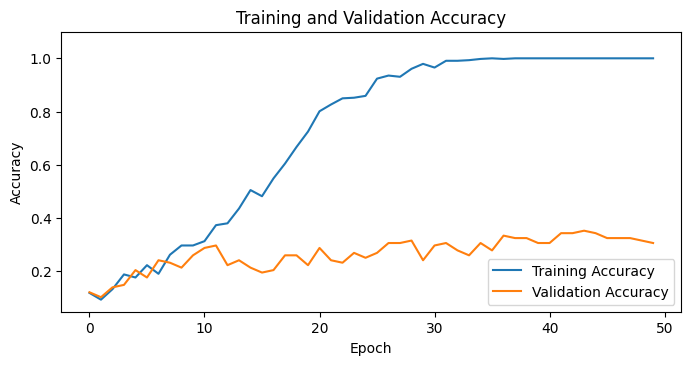

In [16]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')


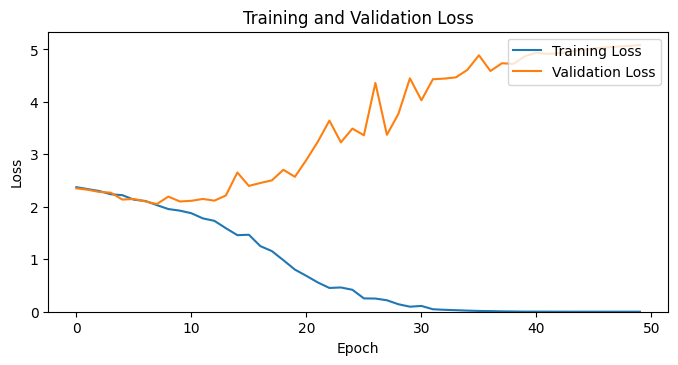

In [17]:

acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
     

1/1 [==============================] - 0s 310ms/step
Predicted:  banh_xeo


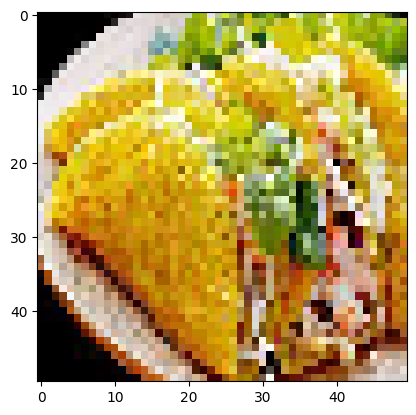

In [18]:
name=  {1:'banh_cuon', 2:'banh_mi',3:'banh_xeo',4:'bun_bo_hue',5:'bun_dau_mam_tom', 6:'chao_long',7:'com_tam',8:'goi_cuon',9:'pho',10:'mi_quang'}  
#test
filePath = '/content/drive/MyDrive/bài báo cáo /banh_seo.jpg'
testImage = load_img(filePath, target_size=(img_size,img_size))
arrayImage = img_to_array(testImage).reshape(1,img_size,img_size,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", name[pred])
plt.imshow(testImage)


In [23]:


# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=50, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

from sklearn.metrics import accuracy_score
# tính độ chính xác 
accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")


2/2 [==============================] - 0s 7ms/step
Accuracy: 32.0 %


In [ ]:
score = model.evaluate(testX, testY, verbose=0)
accuracy = score[1]
print('Accuracy:', accuracy)

Accuracy: 0.5054545402526855
